<a href="https://colab.research.google.com/github/aarthi03/Python-for-Data-Science/blob/main/Traffic_Sign_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==1.15

In [ ]:
pip install scikit-image

**Importing libraries**

---



In [ ]:
import pickle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from sklearn.utils import shuffle # for shuffling the training data
import cv2 # for grayscaling
from skimage.color import rgb2gray
from skimage import io # read in images from the web
from pandas.io.parsers import read_csv
import math
import scipy.ndimage
import pandas as pd

**LOADING THE DATA**

In [ ]:
print('Loading data ...')

training_file = '/content/train.p'
validation_file = '/content/valid.p'
testing_file = '/content/test.p'

# It is good practice to use the "with" keyword when dealing with file objects.
# The advantage is that the file is properly closed after its suite finishes, even if an exception is raised at some point.

with open(training_file, mode='rb') as f: # rb -> r(ead only) and b opens the file in binary mode.
    train = pickle.load(f) # train is a dictionary
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
# NumPy arrays
X_train, y_train = train['features'], train['labels'] # 'features' and 'labels' are keys from the dictionary train
# labels (und somit y_train) enthält die GroundTruth-Daten (= die korrekten labels): [41, 41, 41, ... 25, 25, 25]
# mit Länge = Anzahl der Bilder im training set 
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print('Data successfully loaded.')

Loading data ...
Data successfully loaded.


In [ ]:
# Number of training examples
n_train = len(X_train)
print("Number of training samples =", n_train)

# length of ground truth labels
n_train_y = len(y_train)
print("Length of ground truth labels =", n_train_y)

# Number of validation examples
n_validation = len(X_valid)
print("Number of validation samples =", n_validation)

# Number of testing examples.
n_test = len(X_test)
print("Number of testing samples =", n_test)

# Original Shape of one traffic sign image (here: taking the last image in the training set)
image_shape_width = train['sizes'][-1][0]
image_shape_height = train['sizes'][-1][1]
print("Original Shape of the last image in the training set (width x height): ", image_shape_width, "x", image_shape_height)

# Shape of one traffic sign ((here: taking the first image in the training set))
image_shape = X_train[0].shape
print("Shape of the first image in the training set: {}".format(image_shape)) # print out the shape of one image to know what the dimensions of the data are

# Number of unique classes/labels in the training set
n_classes = len(set(train['labels'])) # first make a set out of the dict "train" to remove duplicates, then count the elements in that set
print("Number of classes =", n_classes)

Number of training samples = 34799
Length of ground truth labels = 34799
Number of validation samples = 4410
Number of testing samples = 12630
Original Shape of the last image in the training set (width x height):  230 x 201
Shape of the first image in the training set: (32, 32, 3)
Number of classes = 43


**DATA VISUALIZATION**



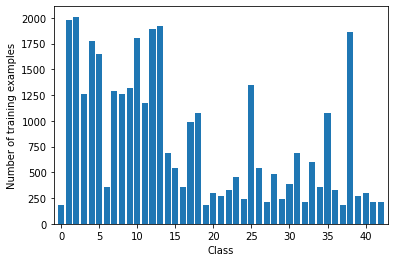

Class 0: Speed limit (20km/h)                                180 samples


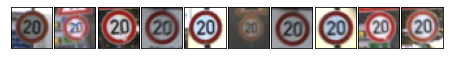

--------------------------------------------------------------------------------------

Class 1: Speed limit (30km/h)                                1980 samples


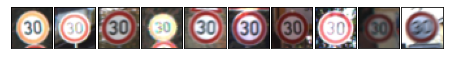

--------------------------------------------------------------------------------------

Class 2: Speed limit (50km/h)                                2010 samples


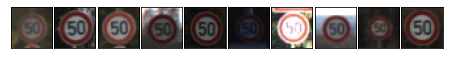

--------------------------------------------------------------------------------------

Class 3: Speed limit (60km/h)                                1260 samples


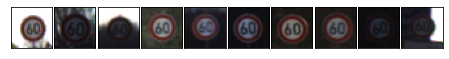

--------------------------------------------------------------------------------------

Class 4: Speed limit (70km/h)                                1770 samples


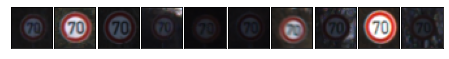

--------------------------------------------------------------------------------------

Class 5: Speed limit (80km/h)                                1650 samples


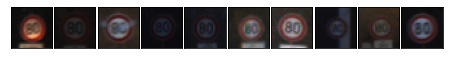

--------------------------------------------------------------------------------------

Class 6: End of speed limit (80km/h)                         360 samples


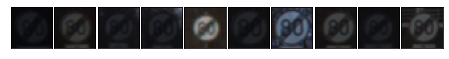

--------------------------------------------------------------------------------------

Class 7: Speed limit (100km/h)                               1290 samples


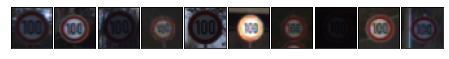

--------------------------------------------------------------------------------------

Class 8: Speed limit (120km/h)                               1260 samples


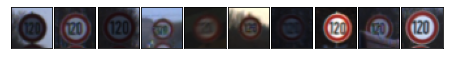

--------------------------------------------------------------------------------------

Class 9: No passing                                          1320 samples


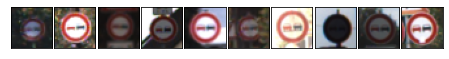

--------------------------------------------------------------------------------------

Class 10: No passing for vehicles over 3.5 metric tons        1800 samples


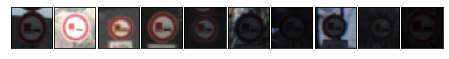

--------------------------------------------------------------------------------------

Class 11: Right-of-way at the next intersection               1170 samples


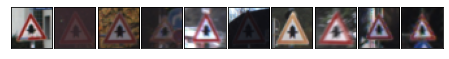

--------------------------------------------------------------------------------------

Class 12: Priority road                                       1890 samples


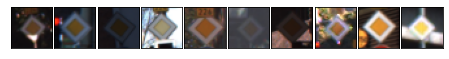

--------------------------------------------------------------------------------------

Class 13: Yield                                               1920 samples


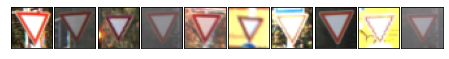

--------------------------------------------------------------------------------------

Class 14: Stop                                                690 samples


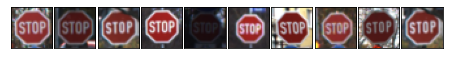

--------------------------------------------------------------------------------------

Class 15: No vehicles                                         540 samples


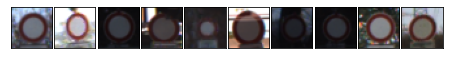

--------------------------------------------------------------------------------------

Class 16: Vehicles over 3.5 metric tons prohibited            360 samples


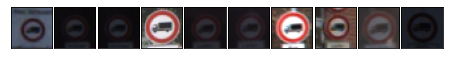

--------------------------------------------------------------------------------------

Class 17: No entry                                            990 samples


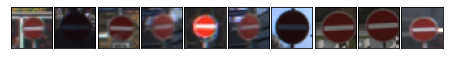

--------------------------------------------------------------------------------------

Class 18: General caution                                     1080 samples


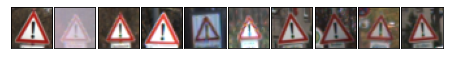

--------------------------------------------------------------------------------------

Class 19: Dangerous curve to the left                         180 samples


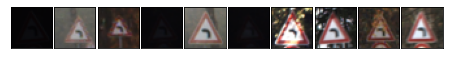

--------------------------------------------------------------------------------------

Class 20: Dangerous curve to the right                        300 samples


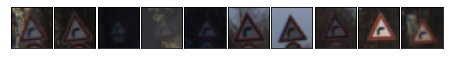

--------------------------------------------------------------------------------------

Class 21: Double curve                                        270 samples


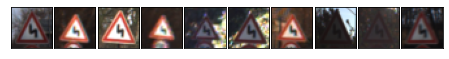

--------------------------------------------------------------------------------------

Class 22: Bumpy road                                          330 samples


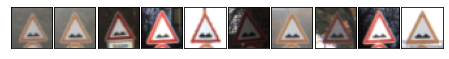

--------------------------------------------------------------------------------------

Class 23: Slippery road                                       450 samples


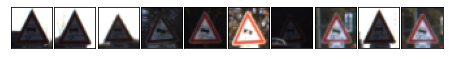

--------------------------------------------------------------------------------------

Class 24: Road narrows on the right                           240 samples


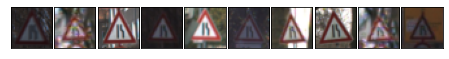

--------------------------------------------------------------------------------------

Class 25: Road work                                           1350 samples


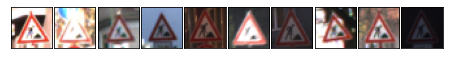

--------------------------------------------------------------------------------------

Class 26: Traffic signals                                     540 samples


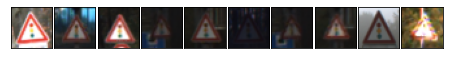

--------------------------------------------------------------------------------------

Class 27: Pedestrians                                         210 samples


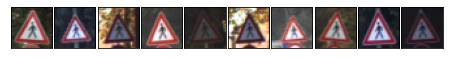

--------------------------------------------------------------------------------------

Class 28: Children crossing                                   480 samples


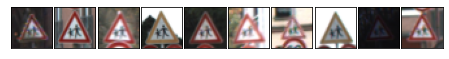

--------------------------------------------------------------------------------------

Class 29: Bicycles crossing                                   240 samples


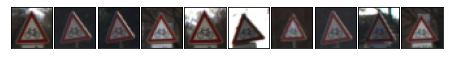

--------------------------------------------------------------------------------------

Class 30: Beware of ice/snow                                  390 samples


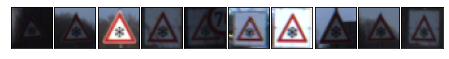

--------------------------------------------------------------------------------------

Class 31: Wild animals crossing                               690 samples


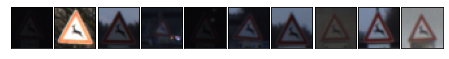

--------------------------------------------------------------------------------------

Class 32: End of all speed and passing limits                 210 samples


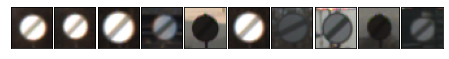

--------------------------------------------------------------------------------------

Class 33: Turn right ahead                                    599 samples


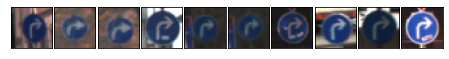

--------------------------------------------------------------------------------------

Class 34: Turn left ahead                                     360 samples


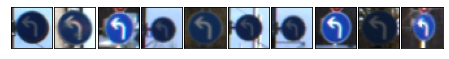

--------------------------------------------------------------------------------------

Class 35: Ahead only                                          1080 samples


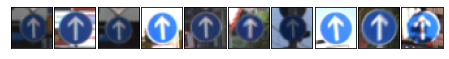

--------------------------------------------------------------------------------------

Class 36: Go straight or right                                330 samples


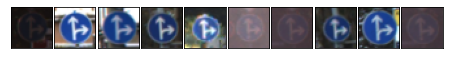

--------------------------------------------------------------------------------------

Class 37: Go straight or left                                 180 samples


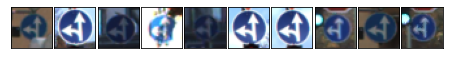

--------------------------------------------------------------------------------------

Class 38: Keep right                                          1860 samples


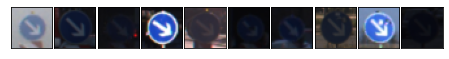

--------------------------------------------------------------------------------------

Class 39: Keep left                                           270 samples


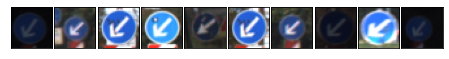

--------------------------------------------------------------------------------------

Class 40: Roundabout mandatory                                300 samples


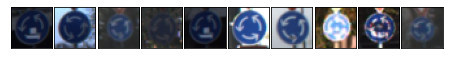

--------------------------------------------------------------------------------------

Class 41: End of no passing                                   210 samples


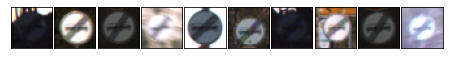

--------------------------------------------------------------------------------------

Class 42: End of no passing by vehicles over 3.5 metric tons  210 samples


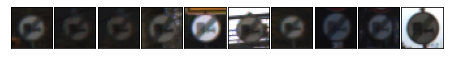

--------------------------------------------------------------------------------------



In [ ]:
%matplotlib inline
signnames = read_csv('/content/signnames.csv').values[:, 1] # the second column of csv contains the signnames

sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)

col_width = max(len(name) for name in signnames)

# display the distribution of classes in the training set
plt.bar(np.arange(43), class_counts, align='center')
plt.xlabel('Class')
plt.ylabel('Number of training examples')
plt.xlim([-1, 43])
plt.show()

# for each class count its number of samples and plot 10 random images
for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print("Class %i: %-*s  %s samples" % (c, col_width, signnames[c], str(c_count)))
    fig = plt.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = random.sample(range(c_index, c_index + c_count), 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    plt.show()
    print("--------------------------------------------------------------------------------------\n")

**Data Augmentation**

In [ ]:
degrees = 10

# Rotating images
degrees_positive = 10
X_train_rotated_positive = []
for i in range(len(X_train)):
    rotated_image = scipy.ndimage.rotate(X_train[i], degrees_positive)
    X_train_rotated_positive.append(rotated_image)
    
degrees_negative = 350
X_train_rotated_negative = []
for i in range(len(X_train)):
    rotated_image = scipy.ndimage.rotate(X_train[i], degrees_negative)
    X_train_rotated_negative.append(rotated_image)    

# Crop image, due to other image size after rotation. Attention: it's not automated! It fit's currently to the 10° rotation.
for i in range(len(X_train_rotated_positive)):
    X_train_rotated_positive[i] = X_train_rotated_positive[i][2:34,2:34]   # box=(y:y+crop, x:x+crop)

for i in range(len(X_train_rotated_negative)):
    X_train_rotated_negative[i] = X_train_rotated_negative[i][2:34,2:34]   # box=(y:y+crop, x:x+crop)
    
# appending rotated images to training set

# Convert the data into list type to use the method "append"
X_train = list(X_train)

# combine the Lists
for i in range(len(X_train_rotated_positive)):
    X_train.append(X_train_rotated_positive[i])
    X_train.append(X_train_rotated_negative[i])
    
#Convert the data back to a np.array
X_train = np.array(X_train)


# New number of training examples (after data augmentation)
new_n_train = len(X_train)
print("New number of training samples after data augmentation =", new_n_train)


# do the same for the labels y_train
# Convert the data into list type to use the method "append"
y_train = list(y_train)

# lengthen the list
for i in range(len(y_train)):
    y_train.append(y_train[i])
    y_train.append(y_train[i])
    
#Convert the data back to a np.array
y_train = np.array(y_train)

# New length of ground truth labels
new_n_train_y = len(y_train)
print("New length of ground truth labels =", new_n_train_y)

New number of training samples after data augmentation = 104397
New length of ground truth labels = 104397


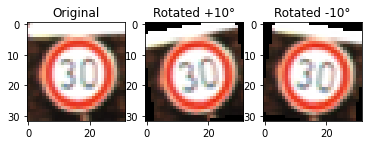

In [ ]:
# Display an example for rotation

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(X_train[3000])
ax1.set_title('Original')    
ax1.axis('ON')  # clear x- and y-axes
ax2.imshow(X_train_rotated_positive[3000])
ax2.set_title('Rotated +10°')    
ax2.axis('ON')  # clear x- and y-axes
ax3.imshow(X_train_rotated_negative[3000])
ax3.set_title('Rotated -10°')   
ax3.axis('ON')  # clear x- and y-axes
plt.savefig('/content/rotation.jpg', dpi=300)
plt.show()

**Data Preprocessing**

In [ ]:
# Normalize the image data
for i in range(len(X_train)):
    X_train[i] = cv2.normalize(X_train[i],None,0,128,cv2.NORM_MINMAX)
    
for i in range(len(X_valid)):
    X_valid[i] = cv2.normalize(X_valid[i],None,0,128,cv2.NORM_MINMAX)
    
for i in range(len(X_test)):
    X_test[i] = cv2.normalize(X_test[i],None,0,128,cv2.NORM_MINMAX)

In [ ]:
X_train = np.sum(X_train/3, axis = 3, keepdims=True)
X_valid = np.sum(X_valid/3, axis = 3, keepdims=True)
X_test = np.sum(X_test/3, axis = 3, keepdims=True)

image.shape -->  (32, 32)
image.size -->  1024
image.dtype -->  float64


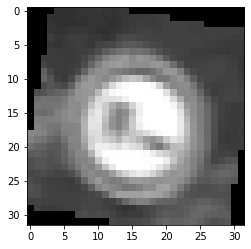

In [ ]:
# Show a random image to demonstrate how it changes through preprocessing
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
print('image.shape --> ', image.shape)
print('image.size --> ', image.size)
print('image.dtype --> ', image.dtype)
plt.imshow(image, cmap="gray")

**Design a Model Architecture (Deep Learning model)**

In [ ]:
from tensorflow.contrib.layers import flatten

def LeNet(x, mu, sigma, strides, strides_pool, keep_prob):
    
    # Layer 1: Convolutional.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 16), mean = mu, stddev = sigma)) 
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=strides, padding='VALID') + conv1_b # convolve the filter over the images
    print("Shape after 1st convolutional layer: ", conv1.shape)

    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Layer 2: Pooling. 
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=strides_pool, padding='VALID')
    print("Shape after 1st pooling: ", conv1.shape)
    
    # Layer 3: Convolutional. 
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 64), mean = mu, stddev = sigma)) 
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv1, conv3_W, strides=strides, padding='VALID') + conv3_b # convolve the filter over the images
    print("Shape after 2nd convolutional layer: ", conv3.shape)

    # Activation.
    conv3 = tf.nn.relu(conv3)

    # Layer 4: Pooling. 
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=strides_pool, padding='VALID')
    print("Shape after 2nd pooling: ", conv3.shape)

    # Layer 5: Convolutional.
    conv5_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 256), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(256))
    conv5   = tf.nn.conv2d(conv3, conv5_W, strides=strides, padding='VALID') + conv5_b
    print("Shape after 3rd convolutional layer: ", conv5.shape)
    
    # Activation.
    conv5 = tf.nn.relu(conv5)
     # Layer 6: Pooling. 
    conv5 = tf.nn.max_pool(conv5, ksize=[1, 2, 2, 1], strides=strides_pool, padding='VALID')
    print("Shape after 3rd pooling: ", conv5.shape)

    # Layer 7: Fully Connected (flatten into a vector).
    fc0 = flatten(conv5)
    print("Shape after flatten: ", fc0.shape)
    
    # Layer 8: Fully Connected. Output = 120 (= width of fully connected layer).
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1024, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    print("Shape after 1st fully connecting: ", fc1.shape)
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout.
    fc1 = tf.nn.dropout(fc1, keep_prob)
    print("Shape after dropout: ", fc1.shape)

    # Output = 43 (because n_classes=43).
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, n_classes), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc1, fc2_W) + fc2_b
    print("Shape after 2nd fully connecting: ", logits.shape)
    
    return logits 
from tensorflow.contrib.layers import flatten

def LeNet(x, mu, sigma, strides, strides_pool, keep_prob):
    
    # Layer 1: Convolutional.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 16), mean = mu, stddev = sigma)) 
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=strides, padding='VALID') + conv1_b # convolve the filter over the images
    print("Shape after 1st convolutional layer: ", conv1.shape)

    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Layer 2: Pooling. 
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=strides_pool, padding='VALID')
    print("Shape after 1st pooling: ", conv1.shape)
    
    # Layer 3: Convolutional. 
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 64), mean = mu, stddev = sigma)) 
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv1, conv3_W, strides=strides, padding='VALID') + conv3_b # convolve the filter over the images
    print("Shape after 2nd convolutional layer: ", conv3.shape)

    # Activation.
    conv3 = tf.nn.relu(conv3)

    # Layer 4: Pooling. 
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=strides_pool, padding='VALID')
    print("Shape after 2nd pooling: ", conv3.shape)

    # Layer 5: Convolutional.
    conv5_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 256), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(256))
    conv5   = tf.nn.conv2d(conv3, conv5_W, strides=strides, padding='VALID') + conv5_b
    print("Shape after 3rd convolutional layer: ", conv5.shape)
    
    # Activation.
    conv5 = tf.nn.relu(conv5)
     # Layer 6: Pooling. 
    conv5 = tf.nn.max_pool(conv5, ksize=[1, 2, 2, 1], strides=strides_pool, padding='VALID')
    print("Shape after 3rd pooling: ", conv5.shape)

    # Layer 7: Fully Connected (flatten into a vector).
    fc0 = flatten(conv5)
    print("Shape after flatten: ", fc0.shape)
    
    # Layer 8: Fully Connected. Output = 120 (= width of fully connected layer).
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1024, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    print("Shape after 1st fully connecting: ", fc1.shape)
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout.
    fc1 = tf.nn.dropout(fc1, keep_prob)
    print("Shape after dropout: ", fc1.shape)

    # Output = 43 (because n_classes=43).
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc1, fc2_W) + fc2_b
    print("Shape after 2nd fully connecting: ", logits.shape)
    
    return logits

**Train and Evaluate the Deep Learning model**

In [ ]:
EPOCHS = 25 # tells TensorFlow how many times to run our training data through the network
# in general the more epochs, the better our model will train but also the longer training will take.

BATCH_SIZE = 128 # tells TensorFlow how many training images to run through the network at a time
# the larger the batch size, the faster our model will train, but our processor may have a memory limit on how large a batch
# it can run

rate = 0.0005 # tells TensorFlow how quickly to update the network's weights; 0.001 is a good default value but can be experimented with
mu = 0 # used in tf.truncated_normal() --> see the model architecture LeNet() below
sigma = 0.1 # dito

# strides 's'. These are passed into LeNet()
strides = [1, 1, 1, 1] # [batch, y_direction, x_direction, input_channels]
strides_pool = [1, 2, 2, 1] # dito

# Dropout technique
keep_prob = 0.7

In [ ]:
import tensorflow as tf
x = tf.placeholder(tf.float32, (None, 32, 32, 1)) # initialize batch size to "None" which allows the placeholder to later accept a batch of any size
y = tf.placeholder(tf.int32, (None)) # not yet one-hot encoded

one_hot_y = tf.one_hot(y, 43) # 1-hot encode the labels

In [ ]:
# pass the input data x (batch of images) to the LeNet function (deep neural network) to calculate logits
logits = LeNet(x, mu, sigma, strides, strides_pool, keep_prob)

# cross entropy is a measure of how different the logits are from the ground truth training labels
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy) # averages the CE from all of the training images
optimizer = tf.train.AdamOptimizer(learning_rate = rate) # uses Adam algorithm to minimize the loss function similarly to SGD.
                                                         # little bit more sophisticated than SGD
training_operation = optimizer.minimize(loss_operation)

Shape after 1st convolutional layer:  (?, 30, 30, 16)
Shape after 1st pooling:  (?, 15, 15, 16)
Shape after 2nd convolutional layer:  (?, 13, 13, 64)
Shape after 2nd pooling:  (?, 6, 6, 64)
Shape after 3rd convolutional layer:  (?, 4, 4, 256)
Shape after 3rd pooling:  (?, 2, 2, 256)
Shape after flatten:  (?, 1024)
Shape after 1st fully connecting:  (?, 120)
Shape after dropout:  (?, 120)
Shape after 2nd fully connecting:  (?, 43)


In [ ]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

# Calculate the model's overall accuracy by averaging the individual prediction accuracies
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # convert from boolean (True or False) to 1 or 0

saver = tf.train.Saver() # create an instance/object of tf.train.Saver() class

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE] # batch the dataset
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y}) # accuracy = 1 or 0
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


**Train and Validate the model**

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE): # range(start, stop, step)
            end = offset + BATCH_SIZE
            batch_x = X_train[offset:end] # break training data into batches
            batch_y = y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y}) # train the model on each batch
            
        # at the end of each epoch, we evaluate the model on our validation data
        validation_accuracy = evaluate(X_valid, y_valid)
        
        # also evaluate the model on training data to see if the model is over- or underfitted
        training_accuracy = evaluate(X_train, y_train)
        
        # also evaluate the model on test data (different from validation data)
        test_accuracy = evaluate(X_test, y_test)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Accuracy on the training set = {:.3f}".format(training_accuracy))
        print("Accuracy on the test set = {:.3f}".format(test_accuracy))
        
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    
    saver.save(sess, 'lenet') # save the model to be able to load it up later and modify it or evaluate it on test dataset
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.672
Accuracy on the training set = 0.715
Accuracy on the test set = 0.671

EPOCH 2 ...
Validation Accuracy = 0.826
Accuracy on the training set = 0.870
Accuracy on the test set = 0.801

EPOCH 3 ...
Validation Accuracy = 0.875
Accuracy on the training set = 0.932
Accuracy on the test set = 0.862

EPOCH 4 ...
Validation Accuracy = 0.912
Accuracy on the training set = 0.959
Accuracy on the test set = 0.892

EPOCH 5 ...
Validation Accuracy = 0.927
Accuracy on the training set = 0.974
Accuracy on the test set = 0.907

EPOCH 6 ...
Validation Accuracy = 0.937
Accuracy on the training set = 0.981
Accuracy on the test set = 0.924

EPOCH 7 ...
Validation Accuracy = 0.932
Accuracy on the training set = 0.981
Accuracy on the test set = 0.921

EPOCH 8 ...
Validation Accuracy = 0.942
Accuracy on the training set = 0.991
Accuracy on the test set = 0.930

EPOCH 9 ...
Validation Accuracy = 0.953
Accuracy on the training set = 0.991
Accuracy on the test s

In [ ]:
from google.colab import drive
drive.mount('/content/examples')

Mounted at /content/examples


**Use the model to make predictions on new images found on the web**

In [ ]:
import os
import glob

# Load images from .png files to `X_custom` NumPy array
X_custom = np.empty([0, 32, 32, 3], dtype = np.float64)

In [ ]:

# loading the images into a file list (no numpy array! only a list)
additional_file_list = [f for f in glob.glob("/content/examples/MyDrive/examples/web/"+'*.png')]

In [ ]:
# read in images and build X_custom

for i in range(len(additional_file_list)):
    image = io.imread('/content/examples/MyDrive/examples/web/' + "example_{0:0>5}".format(i + 1) + '.png')
    image_resized = cv2.resize(image, (32, 32))
    print("read in image has shape: ", image_resized.shape)
    X_custom = np.append(X_custom, [image_resized[:, :, :3]], axis = 0) # X_custom wird kopiert und [image[:, :, :3]] drangehängt
        
print("len(X_custom): ", len(X_custom))
print("X_custom.shape: ", X_custom.shape)
print("X_custom.dtype: ", X_custom.dtype)

read in image has shape:  (32, 32, 4)
read in image has shape:  (32, 32, 3)
read in image has shape:  (32, 32, 3)
read in image has shape:  (32, 32, 4)
read in image has shape:  (32, 32, 4)
len(X_custom):  5
X_custom.shape:  (5, 32, 32, 3)
X_custom.dtype:  float64


In [ ]:
# Enter correct labels (groundtruth) for the images found on the web

# own images
y_custom = np.array([
    25, # "example_00001"
    13, # "example_00002"
    12, # "example_00003"
    11, # "example_00004"
    1, # "example_00005"
])

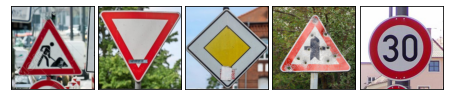

In [ ]:
fig = plt.figure()
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
for i in range(len(X_custom)):
    axis = fig.add_subplot(1, len(additional_file_list), i + 1, xticks=[], yticks=[])
    web_image = io.imread('/content/examples/MyDrive/examples/web/' + "example_{0:0>5}".format(i + 1) + '.png')
    axis.imshow(web_image)

In [ ]:
# Normalize
for i in range(len(X_custom)):
    X_custom[i] = cv2.normalize(X_custom[i],None,0,128,cv2.NORM_MINMAX)

In [ ]:
X_custom = np.sum(X_custom/3, axis = 3, keepdims=True)
print("X_custom[0].shape: ", X_custom[0].shape)
print("X_custom.shape: ", X_custom.shape)

X_custom[0].shape:  (32, 32, 1)
X_custom.shape:  (5, 32, 32, 1)


**Predict the Sign Type for Each Image and Analyze Performance**

In [ ]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    num_examples = len(X_custom)
    BATCH_SIZE = 1
    web_accuracy = evaluate(X_custom, y_custom)
    print("Accuracy on images found on the web = {:.3f}".format(web_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Accuracy on images found on the web = 0.800


In [ ]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    num_examples = len(X_custom) # 5
    total_accuracy = 0
    for i in range(num_examples):
        x_i = X_custom[i:i+1]
        y_i = y_custom[i:i+1]
        accuracy = sess.run(accuracy_operation, feed_dict={x: x_i, y: y_i})
        total_accuracy += (accuracy * len(x_i))
        
print("Accuracy on images found on the web = {:.3f}".format(total_accuracy / num_examples))

INFO:tensorflow:Restoring parameters from ./lenet
Accuracy on images found on the web = 0.800


**Output Top 5 Softmax Probabilities For Each Image Found on the Web**

In [ ]:

### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

top_5_probabilities = tf.nn.top_k(tf.nn.softmax(logits), k=5) # tf.nn.top_k(input, k=?)

keep_prob = 1.0

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    top_5_probabilities_output = sess.run(top_5_probabilities, feed_dict = {x:X_custom, y:y_custom})
    print(top_5_probabilities_output)

INFO:tensorflow:Restoring parameters from ./lenet
TopKV2(values=array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [9.3141514e-01, 5.8262654e-02, 1.0261026e-02, 6.0236831e-05,
        8.2993512e-07],
       [1.0000000e+00, 2.1797155e-29, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00]], dtype=float32), indices=array([[25,  0,  1,  2,  3],
       [13,  0,  1,  2,  3],
       [12,  0,  1,  2,  3],
       [11, 42, 12, 40, 36],
       [ 1,  5,  0,  2,  3]], dtype=int32))
